**Option A**
 * Transform the json profiles into feature vectors 
 * Construct a model to predict if a customer is fraudulent based on their profile.
 * Report on the models success and show what features are most important


In [302]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()


#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

**Loading json file**

In [303]:
from pprint import pprint
with open('D:/Startups/SummitMinds/customersdata.json') as f:
    data = [json.loads(line) for line in f]
pprint(data)

[{'customer': {'customerBillingAddress': '5493 Jones Islands\n'
                                         'Brownside, CA 51896',
               'customerDevice': 'yyeiaxpltf82440jnb3v',
               'customerEmail': 'josephhoward@yahoo.com',
               'customerIPAddress': '8.129.104.40',
               'customerPhone': '400-108-5415'},
  'fraudulent': False,
  'orders': [{'orderAmount': 18,
              'orderId': 'vjbdvd',
              'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896',
              'orderState': 'pending'},
             {'orderAmount': 26,
              'orderId': 'yp6x27',
              'orderShippingAddress': '5493 Jones Islands\nBrownside, CA 51896',
              'orderState': 'fulfilled'}],
  'paymentMethods': [{'paymentMethodId': 'wt07xm68b',
                      'paymentMethodIssuer': 'Citizens First Banks',
                      'paymentMethodProvider': 'JCB 16 digit',
                      'paymentMethodRegistrationFailure': True,
  

                    'transactionId': 'n47dl09n'},
                   {'orderId': '94y9qn',
                    'paymentMethodId': 'wlywsk5au',
                    'transactionAmount': 15,
                    'transactionFailed': False,
                    'transactionId': 'q8z8feru'},
                   {'orderId': 'h0j383',
                    'paymentMethodId': '4rdcaqhb7',
                    'transactionAmount': 11,
                    'transactionFailed': False,
                    'transactionId': '5vwwh56j'},
                   {'orderId': '8iq07j',
                    'paymentMethodId': 'wlywsk5au',
                    'transactionAmount': 39,
                    'transactionFailed': False,
                    'transactionId': 'lkq1ib9d'}]},
 {'customer': {'customerBillingAddress': '304 Heather Fall\n'
                                         'East Christina, UT 45880-4522',
               'customerDevice': 'bwgvb5w8dm6upvi7ucqc',
               'customerEmail': 'avaldez@gmail.

  'fraudulent': False,
  'orders': [{'orderAmount': 19,
              'orderId': '23cqz5',
              'orderShippingAddress': '226 Steven Course\n'
                                      'New Jaime, VI 82101-3297',
              'orderState': 'failed'},
             {'orderAmount': 20,
              'orderId': 'gxeyl2',
              'orderShippingAddress': '938 Miranda Mountain\n'
                                      'Alexandratown, AS 69640',
              'orderState': 'fulfilled'}],
  'paymentMethods': [{'paymentMethodId': 'yu71nlc3z',
                      'paymentMethodIssuer': 'Vertex Bancorp',
                      'paymentMethodProvider': 'JCB 16 digit',
                      'paymentMethodRegistrationFailure': False,
                      'paymentMethodType': 'card'}],
  'transactions': [{'orderId': '23cqz5',
                    'paymentMethodId': 'yu71nlc3z',
                    'transactionAmount': 19,
                    'transactionFailed': True,
                    't

                    'transactionAmount': 40,
                    'transactionFailed': False,
                    'transactionId': 'bkink4ub'}]},
 {'customer': {'customerBillingAddress': '881 Jessica Ford\n'
                                         'Ericksonhaven, FL 83492-3227',
               'customerDevice': 'jvab5ehh3y5u4spybjm4',
               'customerEmail': 'whitedavid@jones-lloyd.org',
               'customerIPAddress': '95.228.108.171',
               'customerPhone': '902.047.2861'},
  'fraudulent': True,
  'orders': [{'orderAmount': 70,
              'orderId': 'gdsjvg',
              'orderShippingAddress': '881 Jessica Ford\n'
                                      'Ericksonhaven, FL 83492-3227',
              'orderState': 'fulfilled'},
             {'orderAmount': 52,
              'orderId': '3oa84g',
              'orderShippingAddress': '881 Jessica Ford\n'
                                      'Ericksonhaven, FL 83492-3227',
              'orderState': 'fulfilled'}

                      'paymentMethodRegistrationFailure': False,
                      'paymentMethodType': 'card'},
                     {'paymentMethodId': 'jcbfj9zj6',
                      'paymentMethodIssuer': 'Bulwark Trust Corp.',
                      'paymentMethodProvider': 'Diners Club / Carte Blanche',
                      'paymentMethodRegistrationFailure': False,
                      'paymentMethodType': 'card'},
                     {'paymentMethodId': '3fvnm2ghs',
                      'paymentMethodIssuer': 'Vertex Bancorp',
                      'paymentMethodProvider': 'JCB 16 digit',
                      'paymentMethodRegistrationFailure': False,
                      'paymentMethodType': 'paypal'}],
  'transactions': [{'orderId': 'eqaoio',
                    'paymentMethodId': '3zzg1etrq',
                    'transactionAmount': 74,
                    'transactionFailed': False,
                    'transactionId': 'gpeuthlg'},
                   {'orderId':

                    'transactionAmount': 36,
                    'transactionFailed': True,
                    'transactionId': 'd4f44rhh'},
                   {'orderId': 'bunmsb',
                    'paymentMethodId': '4nf29mjz1',
                    'transactionAmount': 36,
                    'transactionFailed': True,
                    'transactionId': 'zjplyhca'},
                   {'orderId': 'bunmsb',
                    'paymentMethodId': '4nf29mjz1',
                    'transactionAmount': 36,
                    'transactionFailed': True,
                    'transactionId': 'aegdz9wr'},
                   {'orderId': 'bunmsb',
                    'paymentMethodId': '4nf29mjz1',
                    'transactionAmount': 36,
                    'transactionFailed': True,
                    'transactionId': 'p4bjmsol'},
                   {'orderId': 'bunmsb',
                    'paymentMethodId': '4nf29mjz1',
                    'transactionAmount': 36,
               

In [304]:
import pandas as pd
df = pd.DataFrame(data)
df.head()

,fraudulent,customer,orders,paymentMethods,transactions
0,False,"{'customerEmail': 'josephhoward@yahoo.com', 'c...","[{'orderId': 'vjbdvd', 'orderAmount': 18, 'ord...","[{'paymentMethodId': 'wt07xm68b', 'paymentMeth...","[{'transactionId': 'a9lcj51r', 'orderId': 'vjb..."
1,True,"{'customerEmail': 'evansjeffery@yahoo.com', 'c...","[{'orderId': 'nlghpa', 'orderAmount': 45, 'ord...","[{'paymentMethodId': 'y3xp697jx', 'paymentMeth...","[{'transactionId': '5mi94sfw', 'orderId': 'nlg..."
2,False,"{'customerEmail': 'andersonwilliam@yahoo.com',...","[{'orderId': 'yk34y2', 'orderAmount': 33, 'ord...","[{'paymentMethodId': '8pneoi03z', 'paymentMeth...","[{'transactionId': 'q3lyvbza', 'orderId': 'yk3..."
3,False,"{'customerEmail': 'rubenjuarez@yahoo.com', 'cu...","[{'orderId': 'fbz9ep', 'orderAmount': 34, 'ord...","[{'paymentMethodId': 'pdxjdwui4', 'paymentMeth...","[{'transactionId': 'vx4cjc27', 'orderId': 'fbz..."
4,True,"{'customerEmail': 'uchen@malone.com', 'custome...","[{'orderId': '56h7iw', 'orderAmount': 71, 'ord...","[{'paymentMethodId': 'w1i1zq3rg', 'paymentMeth...","[{'transactionId': 'q8j3dgni', 'orderId': '56h..."


In [305]:
#Creating Customer file
custdf=pd.DataFrame([])
custdata=pd.Series([])

In [306]:
for i in range(df.shape[0]):
    custdata['fraudulent']=df.iloc[i]["fraudulent"]
    custdata['customerEmail']=df.iloc[i]["customer"]['customerEmail']
    custdata['customerPhone']=df.iloc[i]["customer"]['customerPhone']
    custdata['customerIPAddress']=df.iloc[i]["customer"]['customerIPAddress']
    custdata['customerDevice']=df.iloc[i]["customer"]['customerDevice']
    custdata['customerBillingAddress']=df.iloc[i]["customer"]['customerBillingAddress']
    custdf = custdf.append(custdata,ignore_index=True)
    

In [307]:
custdf

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent
0,"5493 Jones Islands\nBrownside, CA 51896",yyeiaxpltf82440jnb3v,josephhoward@yahoo.com,8.129.104.40,400-108-5415,0.0
1,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,r0jpm7xaeqqa3kr6mzum,evansjeffery@yahoo.com,219.173.211.202,1-788-091-7546,1.0
2,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",4m7h5ipl1shyavt6vv2r,andersonwilliam@yahoo.com,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,024.420.0375,0.0
3,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",slovx60t0i558may4ks0,rubenjuarez@yahoo.com,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,670.664.8168x94985,0.0
4,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",j0pd24k5h8dl2fqu0cz4,uchen@malone.com,196.89.235.192,1-981-877-0870,1.0
...,...,...,...,...,...,...
163,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",ecu7ezz0ue67v3fce1o3,mitchellvickie@brewer-jones.com,181.90.104.120,313-124-3836x3528,1.0
164,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",xgv918sclaz40qlp2fee,sbrown@hughes.biz,16.166.2.0,(250)632-6631x02499,1.0
165,"548 Bryant Inlet\nVeronicaside, OK 00522",969zz9zdj8z4gns4sx5p,johnlowery@gmail.com,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,635.676.0955x524,1.0
166,"16953 Jennifer Springs\nKathybury, IL 02095-3215",navessqcnmc9csfjn5cj,ethompson@jackson-sanders.com,203.246.172.244,962.300.2250,1.0


In [308]:
pmentdf=pd.DataFrame([])
pmentdata=pd.Series([])

In [309]:
#Creating a pmentdf from Payment details
for i in range(df.shape[0]):
    for j in range(len(df.iloc[i]["paymentMethods"])):
        pmentdata['customerEmail']=df.iloc[i]["customer"]['customerEmail']
        pmentdata['paymentMethodId']=df.iloc[i]["paymentMethods"][j]['paymentMethodId']
        pmentdata['paymentMethodIssuer']=df.iloc[i]["paymentMethods"][j]['paymentMethodIssuer']
        pmentdata['paymentMethodProvider']=df.iloc[i]["paymentMethods"][j]['paymentMethodProvider']
        pmentdata['paymentMethodRegistrationFailure']=df.iloc[i]["paymentMethods"][j]['paymentMethodRegistrationFailure']
        pmentdata['paymentMethodType']=df.iloc[i]["paymentMethods"][j]['paymentMethodType']
        pmentdf = pmentdf.append(pmentdata,ignore_index=True)

In [310]:
pmentdf.head()

,customerEmail,paymentMethodId,paymentMethodIssuer,paymentMethodProvider,paymentMethodRegistrationFailure,paymentMethodType
0,josephhoward@yahoo.com,wt07xm68b,Citizens First Banks,JCB 16 digit,1.0,card
1,evansjeffery@yahoo.com,y3xp697jx,Solace Banks,VISA 16 digit,1.0,bitcoin
2,evansjeffery@yahoo.com,6krszxc05,Vertex Bancorp,VISA 16 digit,0.0,card
3,evansjeffery@yahoo.com,5z1szj2he,His Majesty Bank Corp.,Diners Club / Carte Blanche,0.0,card
4,evansjeffery@yahoo.com,m52tx8e1s,Vertex Bancorp,Mastercard,0.0,card


In [311]:
orderdf=pd.DataFrame([])
orderdata=pd.Series([])

In [312]:
#Creating a orderdf from Order details
for i in range(df.shape[0]):
    for j in range(len(df.iloc[i]["orders"])):
        orderdata['customerEmail']=df.iloc[i]["customer"]['customerEmail']
        orderdata['orderId']=df.iloc[i]["orders"][j]['orderId']
        orderdata['orderAmount']=df.iloc[i]["orders"][j]['orderAmount']
        orderdata['orderState']=df.iloc[i]["orders"][j]['orderState']
        orderdata['orderShippingAddress']=df.iloc[i]["orders"][j]['orderShippingAddress']
        orderdf = orderdf.append(orderdata,ignore_index=True)

In [313]:
orderdf.head()

,customerEmail,orderAmount,orderId,orderShippingAddress,orderState
0,josephhoward@yahoo.com,18.0,vjbdvd,"5493 Jones Islands\nBrownside, CA 51896",pending
1,josephhoward@yahoo.com,26.0,yp6x27,"5493 Jones Islands\nBrownside, CA 51896",fulfilled
2,evansjeffery@yahoo.com,45.0,nlghpa,"898 Henry Ports\nNew Keithview, CA 95893-2497",fulfilled
3,evansjeffery@yahoo.com,23.0,uw0eeb,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,fulfilled
4,evansjeffery@yahoo.com,43.0,bn44oh,"5093 Bryan Forks\nJoshuaton, FM 01565-9801",fulfilled


In [314]:
transdf=pd.DataFrame([])
transdata=pd.Series([])

In [315]:
#Creating a transdf from transactions details
for i in range(df.shape[0]):
    for j in range(len(df.iloc[i]["transactions"])):
        transdata['customerEmail']=df.iloc[i]["customer"]['customerEmail']
        transdata['transactionId']=df.iloc[i]["transactions"][j]['transactionId']
        transdata['orderId']=df.iloc[i]["transactions"][j]['orderId']
        transdata['paymentMethodId']=df.iloc[i]["transactions"][j]['paymentMethodId']
        transdata['transactionAmount']=df.iloc[i]["transactions"][j]['transactionAmount']
        transdata['transactionFailed']=df.iloc[i]["transactions"][j]['transactionFailed']
        transdf = transdf.append(transdata,ignore_index=True)

In [316]:
transdf.head()

,customerEmail,orderId,paymentMethodId,transactionAmount,transactionFailed,transactionId
0,josephhoward@yahoo.com,vjbdvd,wt07xm68b,18.0,0.0,a9lcj51r
1,josephhoward@yahoo.com,yp6x27,wt07xm68b,26.0,0.0,y4wcv03i
2,evansjeffery@yahoo.com,nlghpa,41ug157xz,45.0,0.0,5mi94sfw
3,evansjeffery@yahoo.com,uw0eeb,41ug157xz,23.0,0.0,br8ba1nu
4,evansjeffery@yahoo.com,bn44oh,y3xp697jx,43.0,1.0,a33145ss


In [317]:
#Creating a ciombined file for custome  and his/her transactions,payment and orders

**Adding count and sum fields of transactions, orders and payments**


**NB:Only numeric fields are used for easy calculations**

In [318]:
#Adding fields from pmentdf,orderdf & transdf
custdf["paymentMethodRegistrationFailure"]=0
custdf["orderAmount"]=0
custdf["transactionAmount"]=0
custdf["transactionFailed"]=0

for i in range(custdf.shape[0]):
    temp= pmentdf.loc[pmentdf["customerEmail"]==custdf.iloc[i]["customerEmail"]]
    custdf["paymentMethodRegistrationFailure"].iloc[i]=temp["paymentMethodRegistrationFailure"].sum()
    temp= orderdf.loc[orderdf["customerEmail"]==custdf.iloc[i]["customerEmail"]]
    custdf["orderAmount"].iloc[i]=temp["orderAmount"].sum()
    temp= transdf.loc[transdf["customerEmail"]==custdf.iloc[i]["customerEmail"]]
    custdf["transactionAmount"].iloc[i]=temp["transactionAmount"].sum()
    custdf["transactionFailed"].iloc[i]=temp["transactionFailed"].sum()
    

C:\Users\melene\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [319]:
custdf.tail()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent,paymentMethodRegistrationFailure,orderAmount,transactionAmount,transactionFailed
163,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",ecu7ezz0ue67v3fce1o3,mitchellvickie@brewer-jones.com,181.90.104.120,313-124-3836x3528,1.0,0.0,126.0,126.0,0.0
164,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",xgv918sclaz40qlp2fee,sbrown@hughes.biz,16.166.2.0,(250)632-6631x02499,1.0,0.0,135.0,149.0,1.0
165,"548 Bryant Inlet\nVeronicaside, OK 00522",969zz9zdj8z4gns4sx5p,johnlowery@gmail.com,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,635.676.0955x524,1.0,0.0,873.0,1033.0,6.0
166,"16953 Jennifer Springs\nKathybury, IL 02095-3215",navessqcnmc9csfjn5cj,ethompson@jackson-sanders.com,203.246.172.244,962.300.2250,1.0,0.0,287.0,378.0,2.0
167,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,0.0,1.0,126.0,176.0,2.0


In [320]:
custdf.tail()

,customerBillingAddress,customerDevice,customerEmail,customerIPAddress,customerPhone,fraudulent,paymentMethodRegistrationFailure,orderAmount,transactionAmount,transactionFailed
163,"829 Ramirez Dam Suite 648\nGatesview, OR 55669...",ecu7ezz0ue67v3fce1o3,mitchellvickie@brewer-jones.com,181.90.104.120,313-124-3836x3528,1.0,0.0,126.0,126.0,0.0
164,"9472 Pacheco Islands Suite 940\nDrewburgh, AZ ...",xgv918sclaz40qlp2fee,sbrown@hughes.biz,16.166.2.0,(250)632-6631x02499,1.0,0.0,135.0,149.0,1.0
165,"548 Bryant Inlet\nVeronicaside, OK 00522",969zz9zdj8z4gns4sx5p,johnlowery@gmail.com,f82c:811f:8a02:e2d6:79b:fcaa:42de:570b,635.676.0955x524,1.0,0.0,873.0,1033.0,6.0
166,"16953 Jennifer Springs\nKathybury, IL 02095-3215",navessqcnmc9csfjn5cj,ethompson@jackson-sanders.com,203.246.172.244,962.300.2250,1.0,0.0,287.0,378.0,2.0
167,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",lu4fgcug8dr0dwbcuui1,dawn05@tucker-brown.com,132.132.95.33,(089)703-7360x8848,0.0,1.0,126.0,176.0,2.0


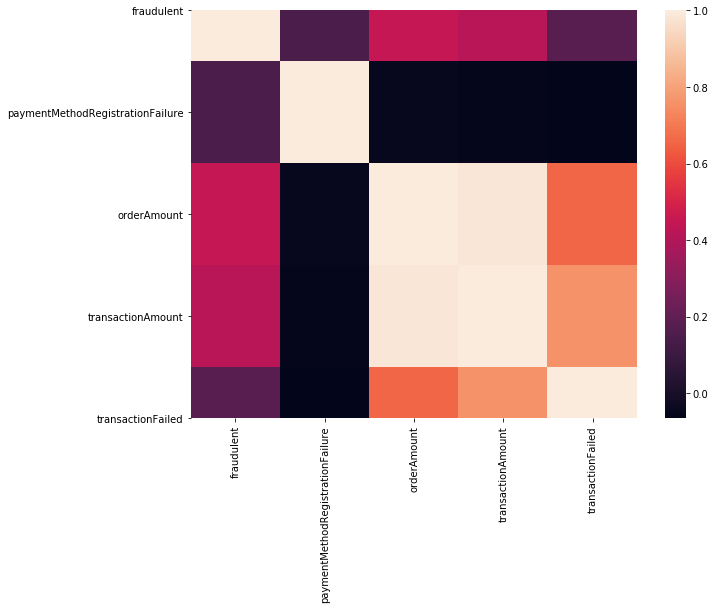

In [321]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(custdf.corr())

# **Creating Prediction Models**

In [322]:
# Import clssification regression modules

from sklearn.linear_model import LogisticRegression

In [323]:
#for logistic regression using statsmodels
train, test = train_test_split(custdf, test_size=0.25, random_state=0)

In [324]:
#Selecting required columns as feature_columns

feature_columns = ['orderAmount',
       'paymentMethodRegistrationFailure', 'transactionAmount',
       'transactionFailed']


In [325]:
feature_columns

['orderAmount',
 'paymentMethodRegistrationFailure',
 'transactionAmount',
 'transactionFailed']

In [326]:
train_x =train[feature_columns]
train_y=train['fraudulent']

In [327]:
train_y.head()

138    0.0
16     0.0
66     0.0
136    1.0
40     1.0
Name: fraudulent, dtype: float64

In [328]:
test_x =test[feature_columns]
test_y=test['fraudulent']

In [329]:
test_x.head()

,orderAmount,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
151,124.0,0.0,217.0,5.0
56,144.0,1.0,240.0,4.0
123,59.0,0.0,59.0,0.0
60,108.0,1.0,108.0,0.0
100,121.0,0.0,191.0,2.0


In [330]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit( train_x, train_y )

C:\Users\melene\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [331]:
logreg.predict(train_x)   #by default, it use cut-off as 0.5

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

In [332]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('orderAmount', 0.018753332808546925),
 ('paymentMethodRegistrationFailure', 0.5513021859071087),
 ('transactionAmount', -0.0065278486366601475),
 ('transactionFailed', -0.32420292964340813)]

In [333]:
logreg.intercept_

array([-1.46513374])

**Predicting the train cases**

In [334]:

train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_x ) } )

In [335]:

train_pred = train_pred.reset_index()

In [336]:
#Comparing the predictions with actual test data
train_pred.sample( n = 10 )

,index,actual,predicted
102,99,1.0,0.0
71,46,1.0,0.0
39,153,1.0,1.0
59,6,1.0,0.0
7,71,0.0,0.0
121,9,1.0,0.0
8,95,0.0,0.0
110,81,0.0,0.0
78,65,1.0,1.0
60,68,1.0,1.0


In [337]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( train_pred.actual,
                            train_pred.predicted, [1,0] )
cm

array([[26, 24],
       [ 4, 72]], dtype=int64)

In [338]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5, 15.0, 'Predicted label')

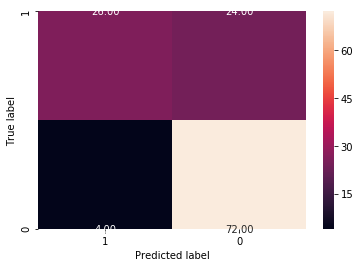

In [339]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [340]:
score = metrics.accuracy_score( train_pred.actual, train_pred.predicted )
round( float(score), 4 )

0.7778

**Predicting the test cases**

In [341]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_x ) } )

In [342]:

test_pred = test_pred.reset_index()

In [343]:
#Comparing the predictions with actual test data
test_pred.sample( n = 10 )

,index,actual,predicted
15,45,1.0,1.0
36,24,0.0,0.0
11,94,0.0,0.0
10,54,0.0,0.0
13,101,0.0,0.0
35,44,0.0,0.0
2,123,0.0,0.0
21,106,0.0,0.0
29,33,0.0,1.0
0,151,1.0,0.0


In [344]:
# Creating a confusion matrix

from sklearn import metrics

cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
cm

array([[ 7,  4],
       [ 4, 27]], dtype=int64)

Text(0.5, 15.0, 'Predicted label')

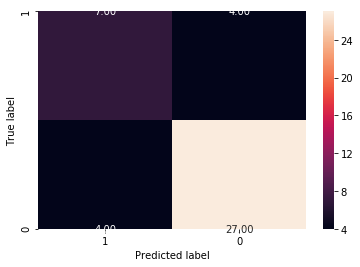

In [345]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [346]:
score = metrics.accuracy_score( test_pred.actual, test_pred.predicted )
round( float(score), 2 )

0.81

Test accuracy is close to  Train accuracy. 

**Building Decision Tree Model**

In [347]:
import sklearn.tree as dt

In [348]:
dir(dt)

['DecisionTreeClassifier',
 'DecisionTreeRegressor',
 'ExtraTreeClassifier',
 'ExtraTreeRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_criterion',
 '_reingold_tilford',
 '_splitter',
 '_tree',
 '_utils',
 'export',
 'export_graphviz',
 'export_text',
 'plot_tree',
 'tree']

In [349]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [350]:
clf_tree = DecisionTreeClassifier( max_depth = 3 )
clf_tree=clf_tree.fit( train_x, train_y )

In [351]:
pd.DataFrame(clf_tree.predict_proba(train_x)).head()

,0,1
0,0.705263,0.294737
1,0.705263,0.294737
2,0.705263,0.294737
3,0.705263,0.294737
4,0.000000,1.000000


In [352]:
tree_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': clf_tree.predict( train_x ) } )

In [353]:
tree_train_pred.head(5)

,actual,predicted
138,0.0,0.0
16,0.0,0.0
66,0.0,0.0
136,1.0,0.0
40,1.0,1.0


In [354]:
tree_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': clf_tree.predict( test_x ) } )

In [355]:
tree_test_pred.head(5)

,actual,predicted
151,1.0,0.0
56,0.0,0.0
123,0.0,0.0
60,1.0,0.0
100,0.0,0.0


In [356]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.7777777777777778

In [357]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8809523809523809

Text(0.5, 15.0, 'Predicted label')

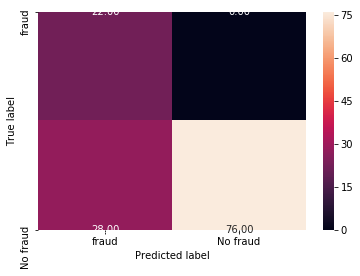

In [358]:
tree_cm = metrics.confusion_matrix( tree_train_pred.predicted,
                                 tree_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["fraud", "No fraud"] , yticklabels = ["fraud", "No fraud"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 15.0, 'Predicted label')

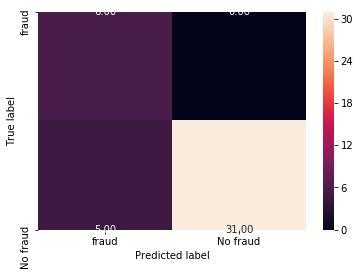

In [359]:
tree_cm = metrics.confusion_matrix( tree_test_pred.predicted,
                                 tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["fraud", "No fraud"] , yticklabels = ["fraud", "No fraud"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

**Random Forest**

In [360]:
from sklearn.ensemble import RandomForestClassifier

In [361]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=100 , max_features=4, n_jobs=-1)
radm_clf.fit( train_x, train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [362]:
radm_train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': radm_clf.predict( train_x ) } )

In [363]:
metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted )

0.9523809523809523

Text(0.5, 15.0, 'Predicted label')

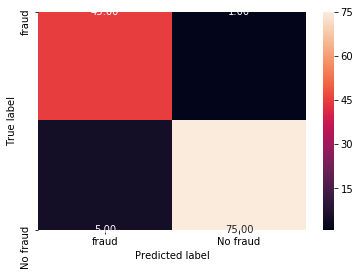

In [364]:
tree_cm = metrics.confusion_matrix( radm_train_pred.predicted,
                                 radm_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["fraud", "No fraud"] , yticklabels = ["fraud", "No fraud"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [365]:
radm_test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': radm_clf.predict( test_x ) } )

In [366]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.7857142857142857

Text(0.5, 15.0, 'Predicted label')

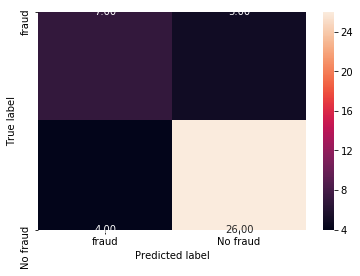

In [367]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["fraud", "No fraud"] , yticklabels = ["fraud", "No fraud"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

**Feature importance from the Random Forest Model**

In [368]:
radm_clf.feature_importances_

array([0.50217962, 0.10088575, 0.32934995, 0.06758468])

In [369]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]

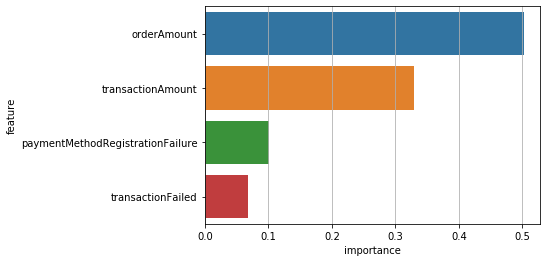

In [370]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_x.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_x.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

**Note: OrderAmount is the most importand feature and transactionFailed is the least importand as shown above**

# Comparison of The Accuracies of Three Models 

**Logistic Regression**

Train : 0.7778

Test : 0.81

**Decision Tree**


Train n: 0.7777777777777778

Test : 0.8809523809523809

**Random Forest**


Train : 0.9523809523809523

Test : 0.7619047619047619

**Note:**
Train and Test accuracies are comparitivily closer for Logistic Regression.
    Currently we have used only numeric variables for quick calculations.We need to use more features to increase the accuracy. 